In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing_data.csv")
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [3]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [4]:
df["Condition"] = df["Condition1"].fillna('') + "_" + df["Condition2"].fillna('')
df["Exterior"] = df["Exterior1st"].fillna('') + "_" + df["Exterior2nd"].fillna('')
df["BasementSF"] = df["BsmtFinSF1"] + df["BsmtFinSF2"] + df["BsmtUnfSF"]
df["FullBathTotal"] = df["FullBath"] + df["BsmtFullBath"]
df["HalfBathTotal"] = df["HalfBath"] + df["BsmtHalfBath"]
df["TotalFloorSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["LowQualFinSF"]
df["Bathrooms"] = df["FullBathTotal"] + df["HalfBathTotal"]
df["Lotsize"] = df["LotFrontage"] + df["LotArea"]

In [5]:
df = df.drop(columns={
    "Condition1", "Condition2",
    "Exterior1st", "Exterior2nd",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "FullBath", "BsmtFullBath",
    "HalfBath", "BsmtHalfBath",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "FullBathTotal", "HalfBathTotal",
    "LotFrontage" , "LotArea"
})

In [6]:
print(df.head())

  MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0       SC60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1       SC20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
2       SC60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
3       SC70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
4       SC60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... YrSold SaleType  SaleCondition  SalePrice  \
0       Gtl      CollgCr  ...   2008       WD         Normal     208500   
1       Gtl      Veenker  ...   2007       WD         Normal     181500   
2       Gtl      CollgCr  ...   2008       WD         Normal     223500   
3       Gtl      Crawfor  ...   2006       WD        Abnorml     140000   
4       Gtl      NoRidge  ...   2008       WD         Normal     250000   

    Condition         Exterior BasementSF TotalFloorSF Bathrooms  Lotsize 

In [7]:
rename_dict = {
    "MSSubClass": "HouseClass", "MSZoning": "Zone", "Neighbourhood":"Location", "YearRemodAdd":"RemodelYear", 
    "BedroomAbvGr":"Bedrooms", "KitchenAbGr":"Kitchens", "TotRmsAbvGrd":"TotalRooms", "OpenPorchSF":"OpenPorch", "MisVal": "MiscValue", 
    "Mosold":"MonthSold", "SalePrice":"Price" , "GrLivArea":"LivingArea"
}

In [8]:
df = df.rename(columns=rename_dict)

In [9]:
print(df.head())
print("/nTotal Columns After Cleaning:", len(df.columns))

  HouseClass Zone Street Alley LotShape LandContour Utilities LotConfig  \
0       SC60   RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1       SC20   RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
2       SC60   RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
3       SC70   RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
4       SC60   RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... YrSold SaleType  SaleCondition   Price  \
0       Gtl      CollgCr  ...   2008       WD         Normal  208500   
1       Gtl      Veenker  ...   2007       WD         Normal  181500   
2       Gtl      CollgCr  ...   2008       WD         Normal  223500   
3       Gtl      Crawfor  ...   2006       WD        Abnorml  140000   
4       Gtl      NoRidge  ...   2008       WD         Normal  250000   

    Condition         Exterior BasementSF TotalFloorSF Bathrooms  Lotsize  
0   Norm_Norm  VinylSd_VinylSd        85

In [10]:
print("Shape of dataset:", df.shape)
display(df.head())
df.info()
df.describe().T

Shape of dataset: (1460, 70)


,HouseClass,Zone,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,YrSold,SaleType,SaleCondition,Price,Condition,Exterior,BasementSF,TotalFloorSF,Bathrooms,Lotsize
0,SC60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2008,WD,Normal,208500,Norm_Norm,VinylSd_VinylSd,856,1710,4,8515
1,SC20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2007,WD,Normal,181500,Feedr_Norm,MetalSd_MetalSd,1262,1262,3,9680
2,SC60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2008,WD,Normal,223500,Norm_Norm,VinylSd_VinylSd,920,1786,4,11318
3,SC70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,2006,WD,Abnorml,140000,Norm_Norm,Wd Sdng_Wd Shng,756,1717,2,9610
4,SC60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2008,WD,Normal,250000,Norm_Norm,VinylSd_VinylSd,1145,2198,4,14344


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HouseClass     1460 non-null   object 
 1   Zone           1460 non-null   object 
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  RemodelYear    1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  MasVnrTy

,count,mean,std,min,25%,50%,75%,max
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
RemodelYear,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
LivingArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
Bedrooms,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0
TotalRooms,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0


In [11]:
print("Missing Values per column:")
print(df.isnull().sum())

Missing Values per column:
HouseClass         0
Zone               0
Street             0
Alley           1369
LotShape           0
                ... 
Exterior           0
BasementSF         0
TotalFloorSF       0
Bathrooms          0
Lotsize            0
Length: 70, dtype: int64


In [12]:
df = df.drop_duplicates()

In [13]:
df = df.dropna()

In [14]:
print("Shape After Cleaning:", df.shape)

Shape After Cleaning: (13, 70)


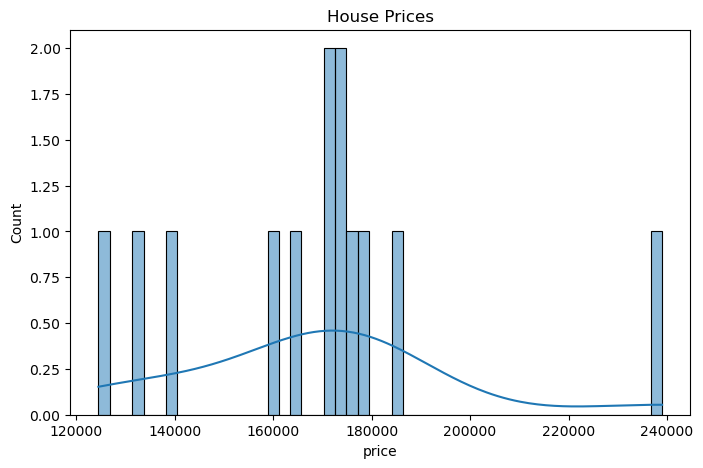

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("House Prices")                     #PRICE DISTRIBUTION OF THE HOUSE
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

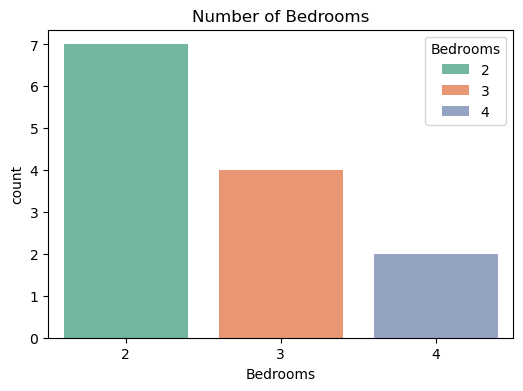

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="Bedrooms", data = df, hue="Bedrooms", palette="Set2")
plt.title("Number of Bedrooms")
plt.show()

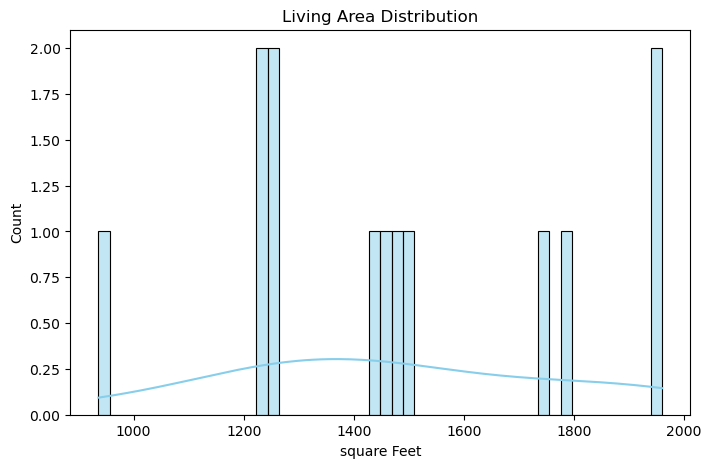

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["LivingArea"], bins=50, kde=True, color="skyblue")
plt.title("Living Area Distribution")
plt.xlabel("square Feet")
plt.ylabel("Count")
plt.show()

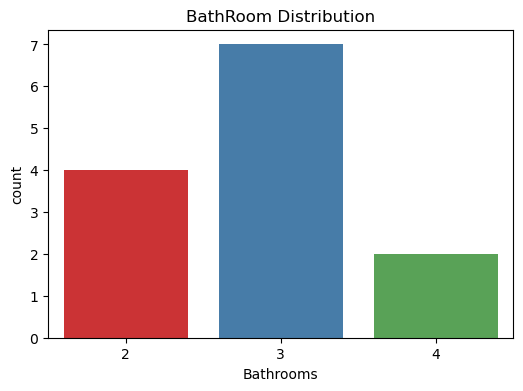

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Bathrooms", data=df, hue="Bathrooms", legend=False, palette="Set1")
plt.title("BathRoom Distribution")
plt.show()

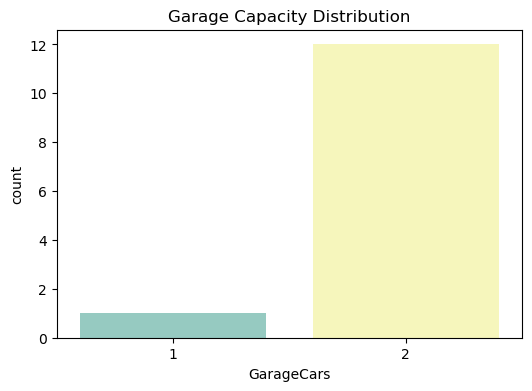

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="GarageCars", 
    data=df, 
    hue="GarageCars", 
    palette="Set3", 
    legend=False
)

plt.title("Garage Capacity Distribution")
plt.show()

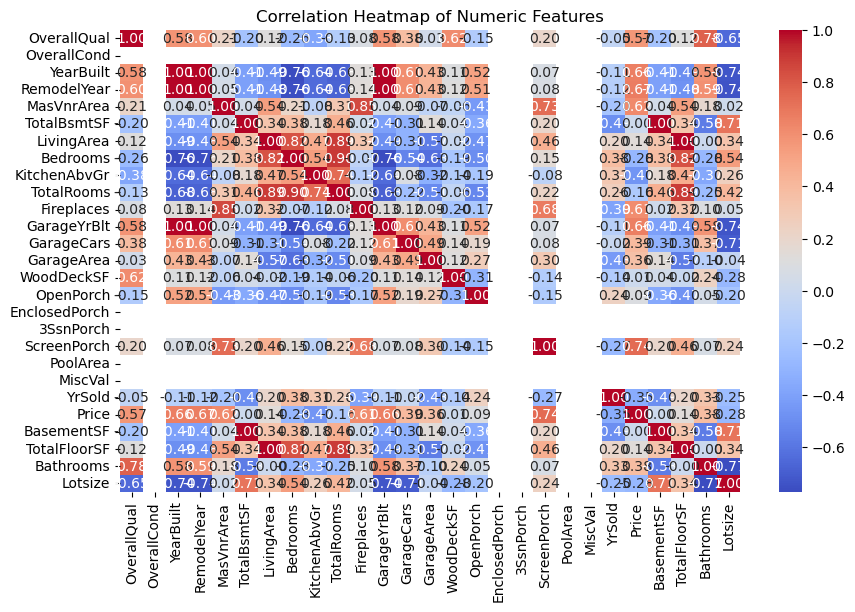

In [20]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

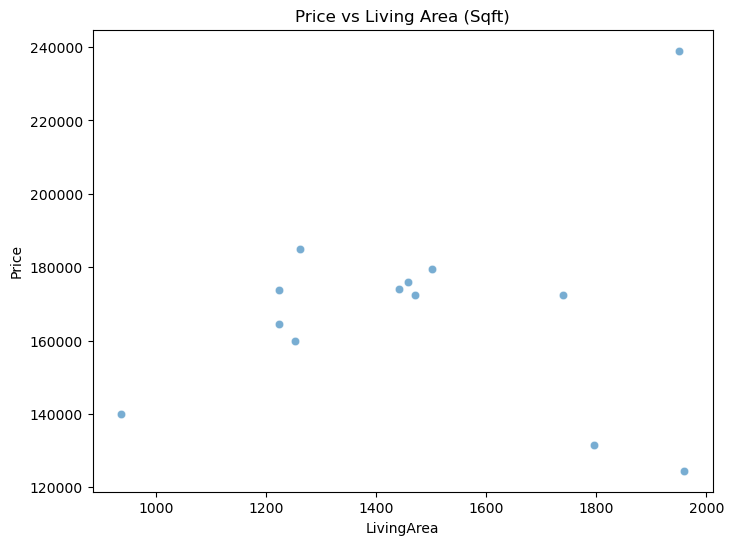

In [21]:
#Price in accordance with LivingArea (Square Footage)
plt.figure(figsize=(8,6))
sns.scatterplot(x="LivingArea", y="Price", data=df, alpha=0.6)
plt.title("Price vs Living Area (Sqft)")
plt.show()

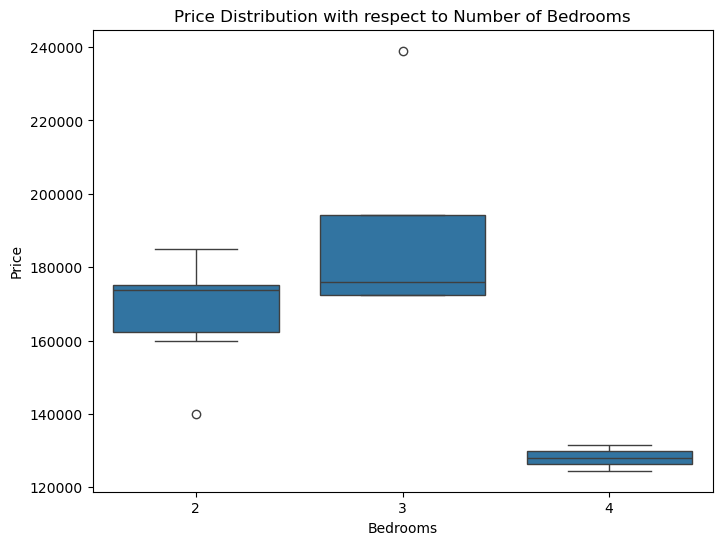

In [22]:
#Price in accordance with Bedrooms
plt.figure(figsize=(8,6))
sns.boxplot(x="Bedrooms", y="Price", data=df,)
plt.title("Price Distribution with respect to Number of Bedrooms")
plt.show()

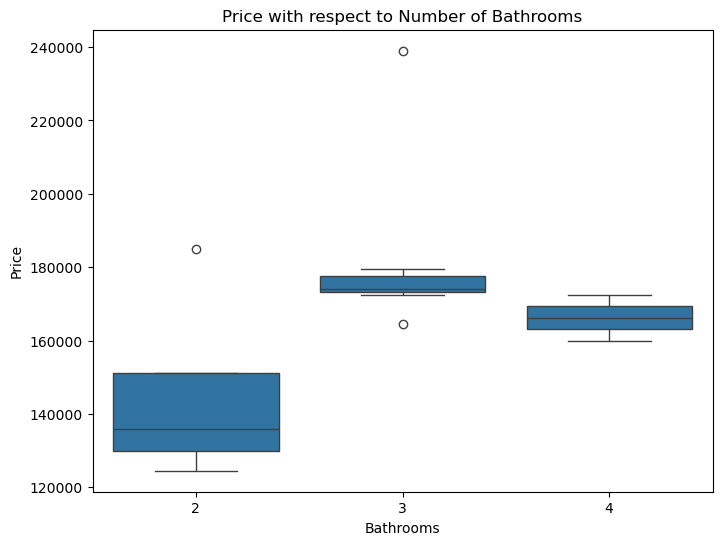

In [23]:
#Price in accordance with Bathrooms
plt.figure(figsize=(8,6))
sns.boxplot(x="Bathrooms", y="Price", data=df,)
plt.title("Price with respect to Number of Bathrooms")
plt.show()

In [24]:
print(df.columns)

Index(['HouseClass', 'Zone', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RemodelYear',
       'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LivingArea', 'Bedrooms', 'KitchenAbvGr',
       'KitchenQual', 'TotalRooms', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorch',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Price', 'Condition', 'Exterior', 'BasementSF',
       'TotalFl

In [25]:
#Dropping unneccessary columns
drop_cols = [
    'Street', 'Alley', 'LandContour', 'RoofStyle', 'RoofMatl', 
    'Fence', 'MiscVal', 'PoolArea', 'PoolQC', 'MiscFeature',
    'Utilities', 'BldgType', 'CentralAir', 'MasVnrArea', 'Electrical', 
    'FireplaceQu', 'GarageCars', 'GarageType', 'GarageYrBlt', 'GarageFinish',
     'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'OpenPorch', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'MoSold', 'YrSold', 'SaleType', 
]
df = df.drop(columns=drop_cols, errors="ignore")

print("Remaining  Columns", df.columns.tolist())      #checking remaining columns

Remaining  Columns ['HouseClass', 'Zone', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RemodelYear', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'LivingArea', 'Bedrooms', 'KitchenAbvGr', 'KitchenQual', 'TotalRooms', 'Functional', 'Fireplaces', 'GarageArea', 'SaleCondition', 'Price', 'Condition', 'Exterior', 'BasementSF', 'TotalFloorSF', 'Bathrooms', 'Lotsize']


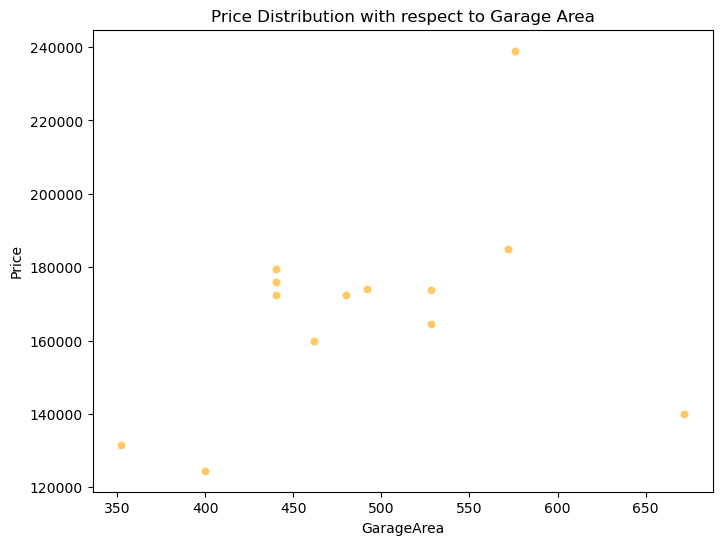

In [26]:
#Price in accordance with GarageArea
plt.figure(figsize=(8,6))
sns.scatterplot(x="GarageArea", y="Price", data=df, alpha=0.6, color="orange")
plt.title("Price Distribution with respect to Garage Area")
plt.show()

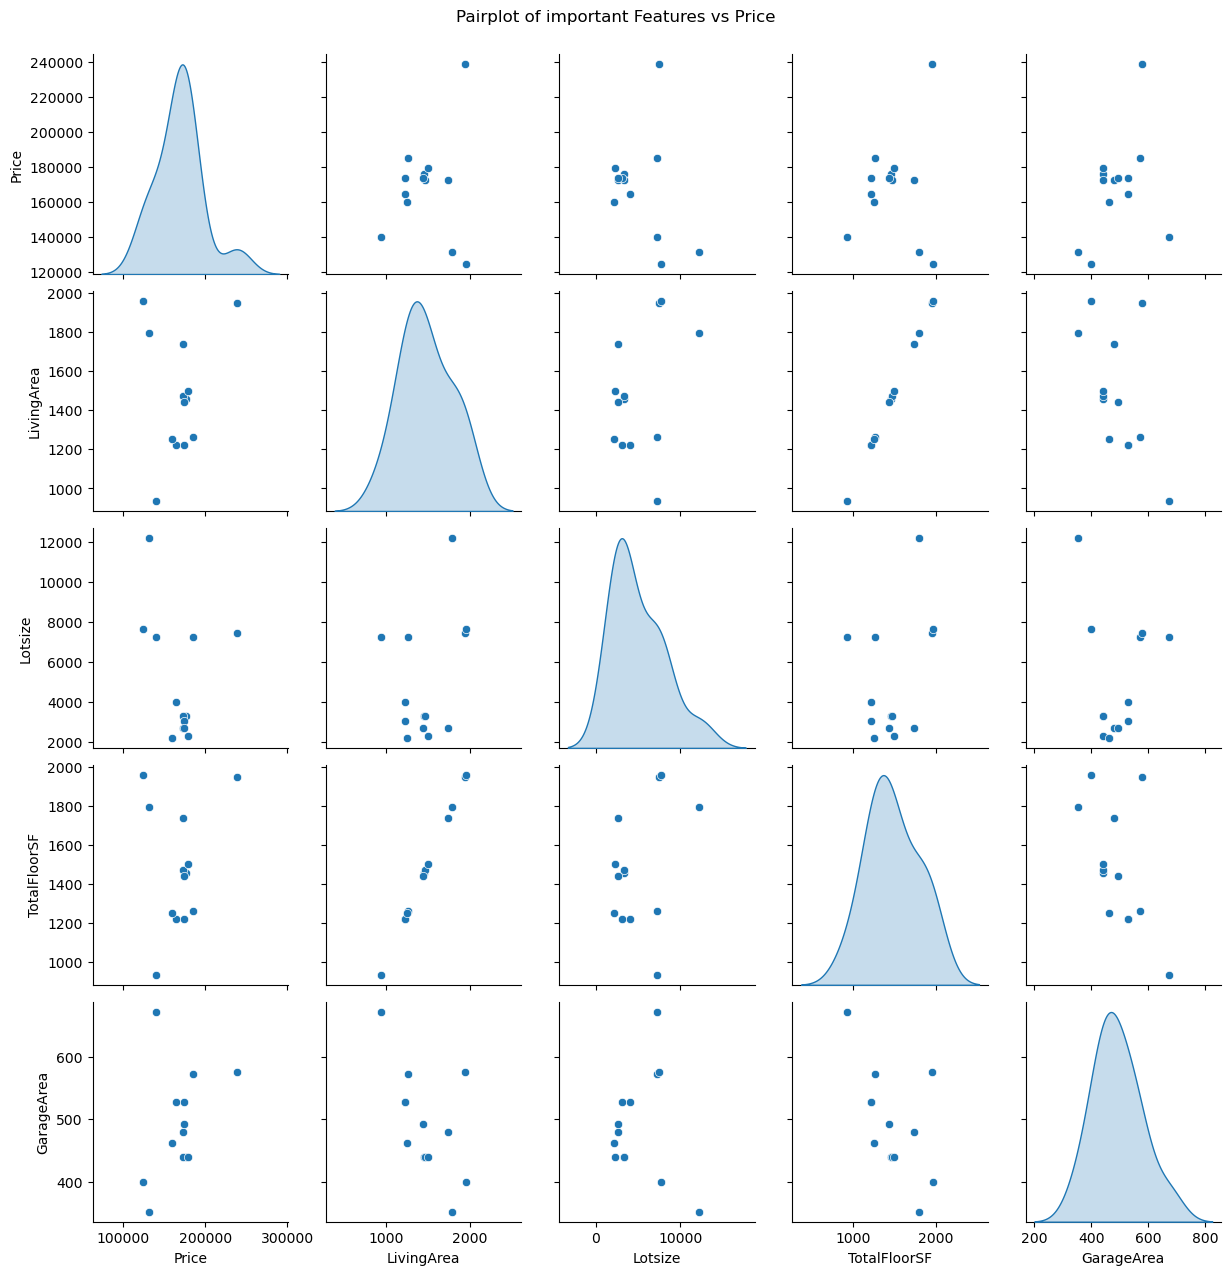

In [27]:
#pairplot
sns.pairplot(df[["Price", "LivingArea", "Lotsize", "TotalFloorSF", "GarageArea"]],diag_kind="kde")
plt.suptitle("Pairplot of important Features vs Price", y=1.02)
plt.show()

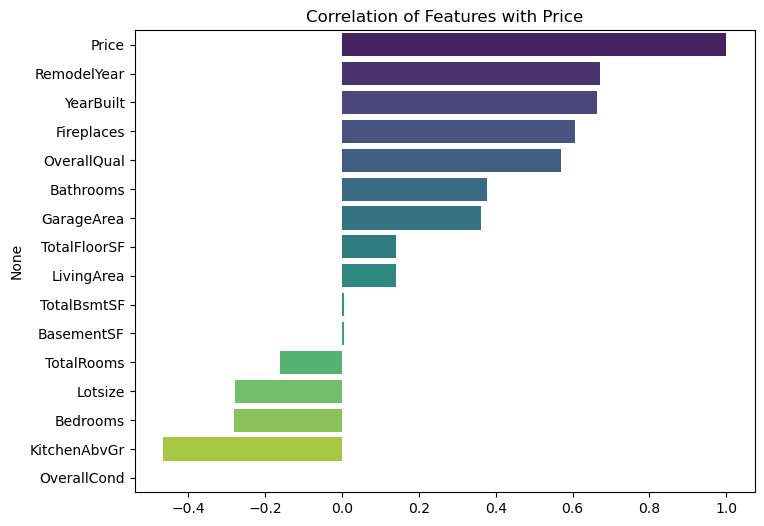

In [28]:
correlation = df.corr(numeric_only=True)["Price"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(
    x=correlation.values,
    y=correlation.index,
    hue=correlation.index,  
    palette="viridis",
    legend=False              
)
plt.title("Correlation of Features with Price")
plt.show()

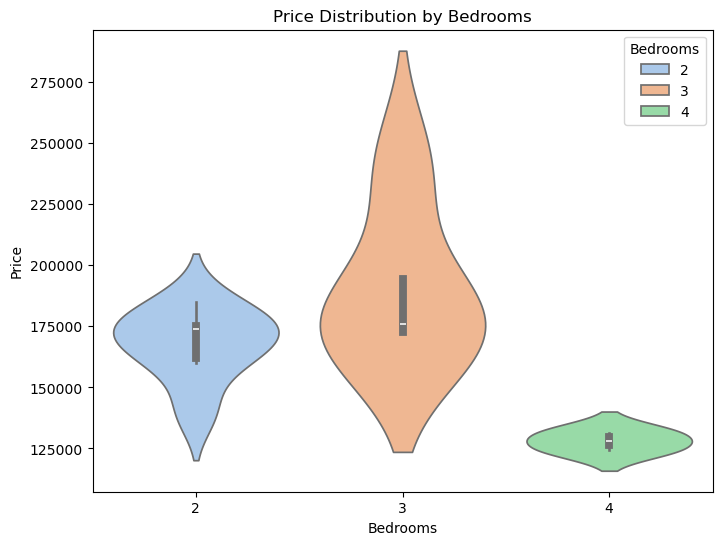

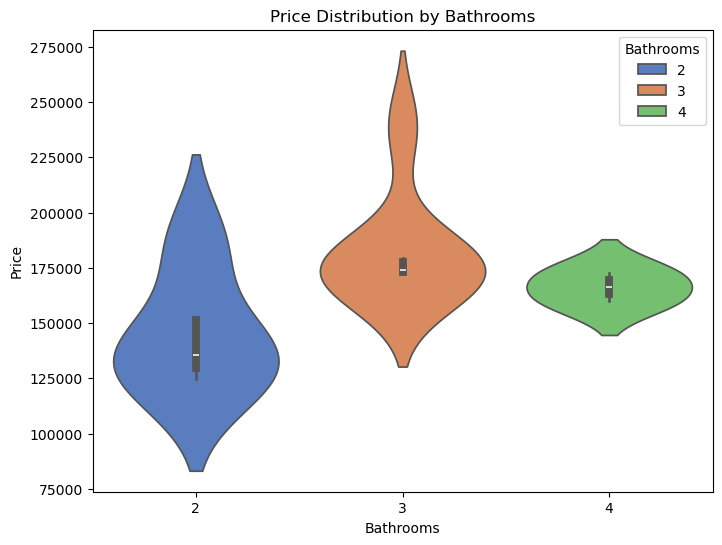

In [29]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Bedrooms", y="Price", data=df, inner="box", palette="pastel", hue="Bedrooms")
plt.title("Price Distribution by Bedrooms")
plt.show()

plt.figure(figsize=(8,6))
sns.violinplot(x="Bathrooms", y="Price", data=df, inner="box", palette="muted", hue="Bathrooms")
plt.title("Price Distribution by Bathrooms")
plt.show()

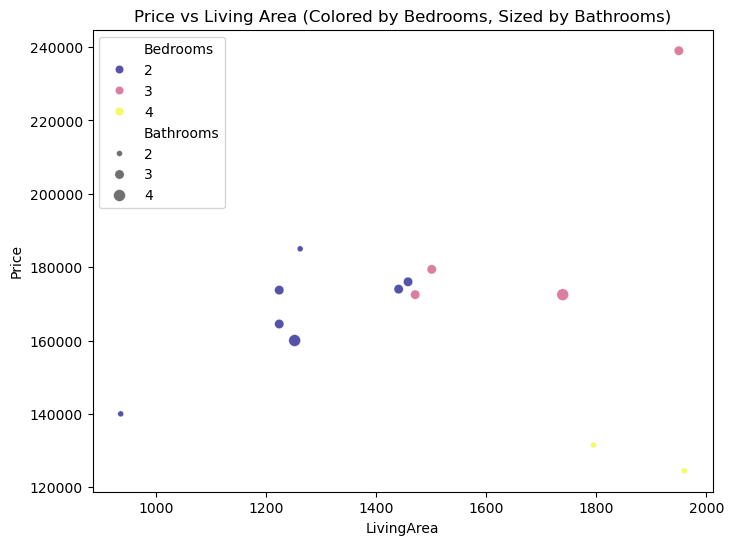

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="LivingArea", y="Price", hue="Bedrooms", size="Bathrooms", data=df, alpha=0.7, palette="plasma")
plt.title("Price vs Living Area (Colored by Bedrooms, Sized by Bathrooms)")
plt.show()

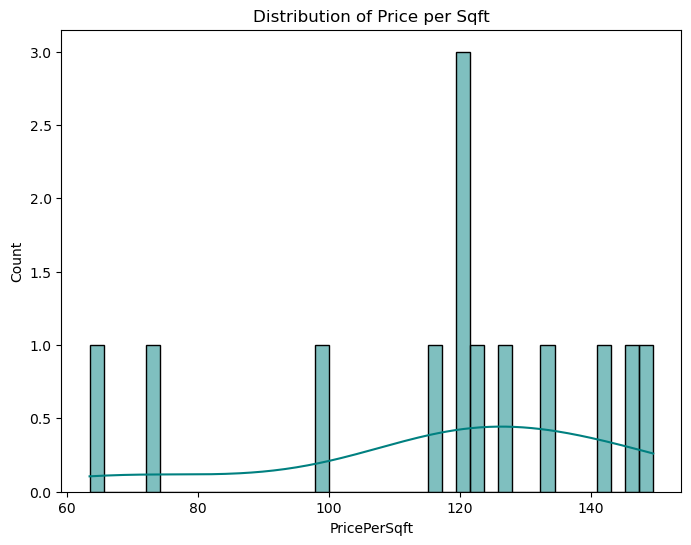

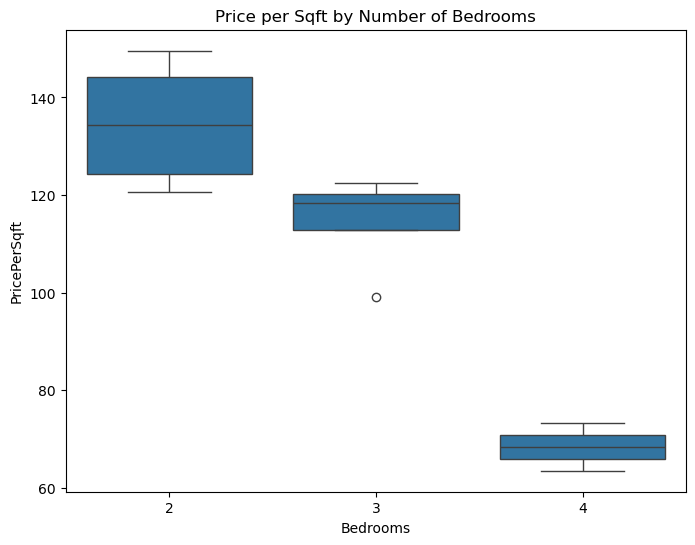

In [31]:
df["PricePerSqft"] = df["Price"] / df["LivingArea"]

plt.figure(figsize=(8,6))
sns.histplot(df["PricePerSqft"], kde=True, bins=40, color="teal")
plt.title("Distribution of Price per Sqft")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="Bedrooms", y="PricePerSqft", data=df)
plt.title("Price per Sqft by Number of Bedrooms")
plt.show()

In [32]:
if "sqft" in df.columns:
    df["price_per_sqft"]=df["Price"]/df["sqft"]

In [33]:
if "year_built" in df.columns:
    df["Property_age"]=2025-df["year_built"]

In [34]:
print(df.columns)

Index(['HouseClass', 'Zone', 'LotShape', 'LotConfig', 'LandSlope',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'RemodelYear', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'LivingArea',
       'Bedrooms', 'KitchenAbvGr', 'KitchenQual', 'TotalRooms', 'Functional',
       'Fireplaces', 'GarageArea', 'SaleCondition', 'Price', 'Condition',
       'Exterior', 'BasementSF', 'TotalFloorSF', 'Bathrooms', 'Lotsize',
       'PricePerSqft'],
      dtype='object')


In [35]:
if "year" in df.columns:
    yearly_trend= df.groupby("year")["Price"].mean()
    plt.figure(figsize(10,6))
    yearly_trend.plot(kind="line", marker="o")
    plt.title('Average Price by year')
    plt.ylabel("Average Price")
    plt.show()

In [36]:
if "pool" in df.columns:
    plt.figure(figsize(6,4))
    sns.boxplot(x="pool", y="Price", data=df)
    plt.title("Effect of pool on Price")
    plt.show()

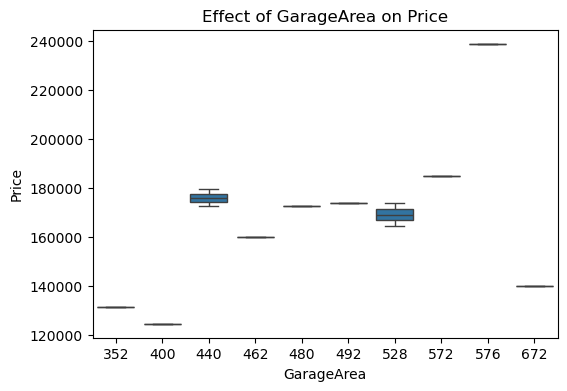

In [37]:
if 'GarageArea' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='GarageArea', y="Price", data=df)
    plt.title("Effect of GarageArea on Price")
    plt.show()

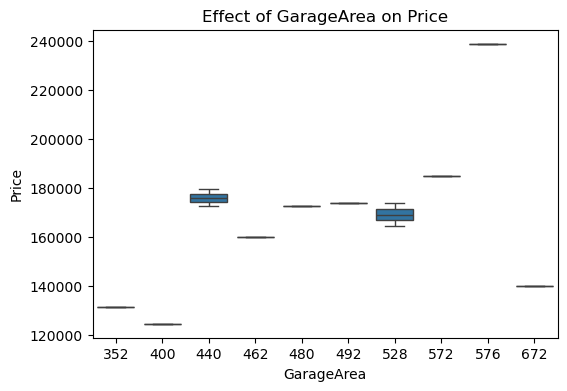

In [38]:
if 'GarageArea' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='GarageArea', y="Price", data=df)
    plt.title("Effect of GarageArea on Price")
    plt.show()

In [39]:
df.to_csv("housing_data.csv", index=False)
print("Cleaned dataset saved as 'Final dataset'")

Cleaned dataset saved as 'Final dataset'


In [40]:
print(df.head)

<bound method NDFrame.head of      HouseClass Zone LotShape LotConfig LandSlope Neighborhood HouseStyle  \
56        SC160   FV      Reg    Inside       Gtl      Somerst     2Story   
87        SC160   FV      Reg    Corner       Gtl      Somerst     2Story   
115       SC160   FV      Reg    Corner       Gtl      Somerst     2Story   
281        SC20   FV      Reg    Inside       Gtl      Somerst     1Story   
297        SC60   FV      IR1    Inside       Gtl      Somerst     2Story   
505        SC90   RM      Reg    Inside       Gtl      OldTown     2Story   
579        SC50   RM      Reg    Inside       Gtl      OldTown     1.5Fin   
755       SC160   FV      Reg    Inside       Gtl      Somerst     2Story   
758       SC160   FV      Reg    Inside       Gtl      Somerst     2Story   
914       SC160   FV      Reg    Inside       Gtl      Somerst     2Story   
1091      SC160   FV      Reg    Inside       Gtl      Somerst     2Story   
1129       SC90   RM      Reg    Inside       

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor     #predicting usinng cleaned dataset
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [42]:
#keeping Price as a target variable 
y = df['Price']

In [43]:
feature_cols = ["LivingArea", 'Bedrooms', 'Bathrooms']

In [44]:
if 'price_per_sqft' in df.columns:
    feature_cols.append('price_per_sqft')
if 'Property_age' in df.columns:
    feature_cols.append('property_age')

In [45]:
X = df[feature_cols]

In [46]:
print("Features Used:", feature_cols)

Features Used: ['LivingArea', 'Bedrooms', 'Bathrooms']


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 10
Testing samples: 3


In [48]:
#I am using 2 evaluating models to evaluate the performances
#Linear Regesssion
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)



In [49]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [50]:
print("Linear Regression")
print("RMSE:", round(rmse_lr, 2))
print("R²:", round(r2_lr, 3))

Linear Regression
RMSE: 12642.42
R²: 0.345


In [51]:
#Random forest
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
y_pred_rf = rf.predict(X_test)

In [53]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [54]:
print("Linear Regression")
print("RMSE:", round(rmse_rf, 2))
print("R²:", round(r2_rf, 3))

Linear Regression
RMSE: 20265.13
R²: -0.683


In [55]:
#comparing both of the models
models = pd.DataFrame({
    "model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "R²": [r2_lr, r2_rf]
})
display(models)

,model,RMSE,R²
0,Linear Regression,12642.419964,0.344862
1,Random Forest,20265.131672,-0.683338
